In [1]:
from Utilities.RobotClass import *
from Utilities.kukaKinematics import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [2]:
Kuka = Robot(Mlist, ['z', '-z', 'x', 'x', '-z','x'], Tne)

In [3]:
Kuka.transform(Slist,[0,-np.pi/2,np.pi/2,0,0,0])
Kuka.draw_robot()

WebVisualizer(window_uid='window_0')

In [8]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()

In [79]:
th1, th2, th3, th4, th5, th6 = dynamicsymbols('theta_1, theta_2, theta_3, theta_4, theta_5, theta_6')
al1,al2,al3,al4,al5,al6,al7 = sp.symbols('alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6,alpha_7,')
config = sp.Matrix([[sp.pi,0,-400,th1],[sp.pi/2,25,0,th2],[0,455,0,th3 + sp.pi/2],[sp.pi/2, 35, -420, th4],[-sp.pi/2,0,0,th5],[sp.pi/2, 0, 0,th6]])

Sic_config = sp.Matrix(sp.zeros(6,4))
Sic_config[:,0] = config[:,1]
Sic_config[:,1] = config[:,0]
Sic_config[:,2] = config[:,2]
Sic_config[:,3] = config[:,3]

Sic_config

def A1_sym(th_i, d_i):
    ct = sp.cos(th_i)
    st = sp.sin(th_i)
    A1 = sp.Matrix([[ct, -st, 0.0, 0.0], [st, ct, 0.0, 0.0], [0.0, 0.0, 1, d_i], [0.0, 0.0, 0.0, 1]])
    return A1
def A2_sym(al_i, a_i):
    ca = sp.cos(al_i)
    sa = sp.sin(al_i)
    A2 = sp.Matrix([[1, 0.0, 0.0, a_i], [0.0, ca, -sa, 0.0], [0.0, sa, ca, 0.0], [0.0, 0.0, 0.0, 1]])
    return A2


In [85]:
def T_from_sic(config):
    n = len(config.col(0))
    Alist = [sp.zeros(4,4)]*n
    Tlist = [sp.zeros(4,4)]*n
    for i in range(n):
        al_i = config[i,0]
        a_i = config[i,1]
        d_i = config[i,2]
        th_i = config[i,3]
        Alist[i] = A1_sym(th_i, d_i) * A2_sym(al_i, a_i)

        T = sp.eye(4)
        for j in range(i):
            T = T * Alist[j]
        Tlist[i] = T
    return Tlist


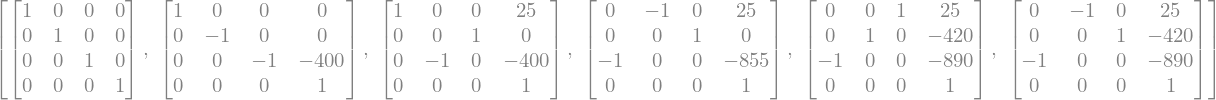

In [86]:
config1 = config.subs({th1:0,th2:0,th3:0,th4:0,th5:0,th6:0})
Tkuk = T_from_sic(config1)
Tkuk
# Alist = [sp.zeros(4,4)]*n
# type(Alist[2])


In [39]:
M1=sp.Matrix([[0, 1, 0, 0], #Joint 1
             [1, 0, 0, 0],
             [0, 0, -1, 200],
             [0, 0, 0, 1]])

M2=sp.Matrix([[1, 0, 0, 25],
             [0, 0, 1, 0],
             [0, -1, 0, 400],
             [0, 0, 0, 1]])

M3=sp.Matrix([[1, 0, 0, 455+25],
             [0, 0, 1, 0],
             [0, -1, 0, 400],
             [0, 0, 0, 1]])
M4=sp.Matrix([[0, 0, -1, 455+25+200],
             [0, 1, 0, 0],
             [1, 0, 0, 400+35],
             [0, 0, 0, 1]])
M5=sp.Matrix([[1, 0, 0, 455+25+420],
             [0, 0, 1, 0],
             [0, -1, 0, 400+35],
             [0, 0, 0, 1]])
M6=sp.Matrix([[0, 0, -1, 455+25+420], #Joint 6
             [0, 1, 0, 0],
             [1, 0, 0, 400+35],
             [0, 0, 0, 1]])
Mlist = np.array([M1,M2,M3,M4,M5,M6], dtype=float)


array([[ 0.000e+00,  0.000e+00, -0.000e+00,  3.264e+05],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00, -0.000e+00,  0.000e+00,  1.740e+05],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00]])